/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


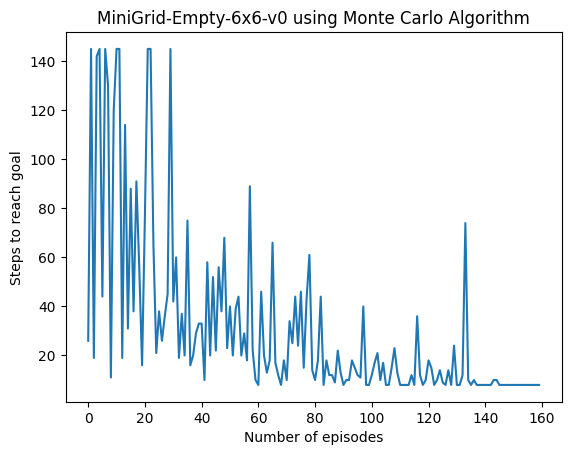

policy = [2, 2, 2, 1, 2, 2, 2]


In [ ]:
# FINAL MONTE CARLO
import gym
import numpy as np
!pip install gym-minigrid
import random
import matplotlib.pyplot as plt

env = gym.make('MiniGrid-Empty-6x6-v0',render_mode='rgb_array')
env.reset()
#no_of_steps=[]
num_episodes = 150
nofepisode=[]

Q={}
policy = {}
gamma=0.99
alpha=0.1
epsilon = 1
steps_req = []

def policy_updation(Q, state_space, epsilon):
    if np.random.rand() < epsilon:
        action = np.random.randint(0, 3)
    else:
        action = np.argmax(Q[state_space])
    return action

def monte_Q_values(episode):
  G = 0
  for i in range(len(episode)-1,-1,-1):
    state_space,action,reward=episode[i]
    G = reward + G*gamma
    direction=env.agent_dir

    if state_space not in Q:
      #Q[state]=[0,1,2]   #actions 0 and 1 and 2
      Q[state_space] = np.zeros(3) # [0,0,0]
    # policy_updation(Q,state,epsilon)

    Q[state_space][action] = Q[state_space][action] + alpha*(G - Q[state_space][action])
  return Q

for i in range(num_episodes+10):
  obs=env.reset()
  state=(1,1,0)
  done = False
  episode_data = []
  trunc = False
  max_steps= 300
  steps=1
  policy = []
  #count=1
  while not done and not trunc:
    state_space = state
    if state_space not in Q:
      #Q[state]=[0,1,2]   #actions 0 and 1 and 2
      Q[state_space] = [0,0,0]   #[0,0,0]


    action = policy_updation(Q,state_space,epsilon)
    policy.append(action)
    n_obs,reward,done,trunc,info = env.step(action)
    episode_data.append((state_space,action,reward))
    n_state=env.agent_pos
    new_dir = env.agent_dir
    state_space_2 = (n_state[0],n_state[1],new_dir)
    if state_space_2 not in Q:
      #Q[state]=[0,1,2]   #actions 0 and 1 and 2
      Q[state_space_2] = [0,0,0]   #[0,0,0]
    #state=env.agent_pos
    steps+=1
    state = state_space_2


    #count+=1

    epsilon = (-i/num_episodes) + 1

  nofepisode.append(i)
  steps_req.append(steps)
  monte_Q_values(episode_data)




#plt.title("MiniGrid-Empty-8x8-v0 using Monte Carlo Algorithm")
plt.title("MiniGrid-Empty-6x6-v0 using Monte Carlo Algorithm")
plt.plot(nofepisode, steps_req)
plt.xlabel("Number of episodes")
plt.ylabel("Steps to reach goal")
plt.show()
print('policy =',policy)